<a href="https://colab.research.google.com/github/jacquelinemak/MMA_869_Classication_Project/blob/main/v3_MMA_2021_869_Individual_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA 869: Individual Assignment

Version 1: Updated September 27, 2021


- [Jacqueline, Mak]
- [20311028]
- [Section 2]
- [Little Fires Everywhere]
- [December 12, 2021]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python. You may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and scipy`.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [ ]:
import datetime

import pandas as pd
import numpy as np

import seaborn as sns #for visualization 
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
print(datetime.datetime.now())

2021-12-12 19:11:51.286021


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.12


In [ ]:
!echo $PYTHONPATH

/env/python


# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every single posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a winner and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.


## 1.0: Load and Explore Data 

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [ ]:
list(df1)

['Age', 'Income', 'SpendingScore', 'Savings']

In [ ]:
df1.head(n=10)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


In [ ]:
df1.shape

(505, 4)

In [ ]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


In [ ]:
#Check for any missing values in the dataset
print(df1.isna().sum())


Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64


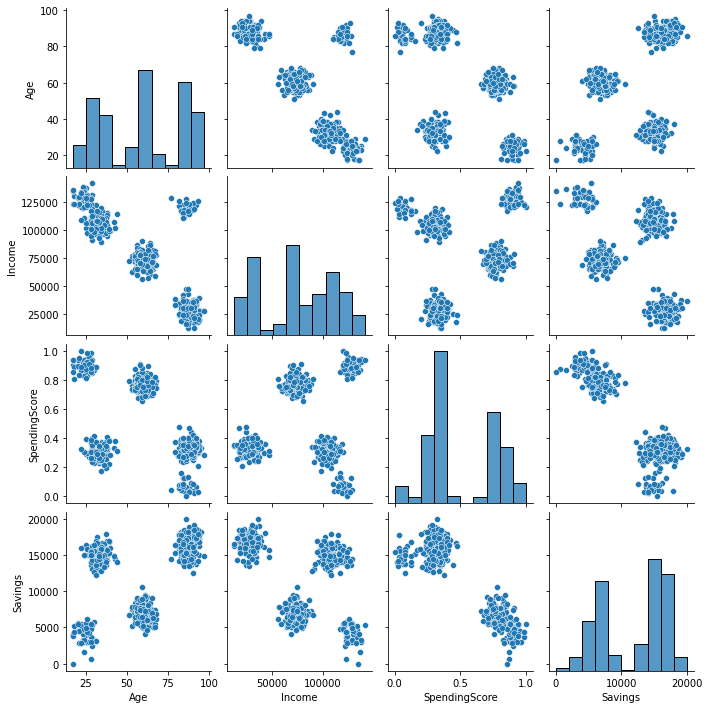

In [ ]:
#Plot the Raw Data
#What are dealing with? What does it look like?

sns.pairplot(df1)

## 1.1: Clustering Algorithm #1 - K-Means

In [ ]:
X = df1.to_numpy

In [ ]:
#Normalize the data to apply K-Means
#Apply a transformation (use StandardScaler) to the features before clustering

X = df1.copy()
scaler = StandardScaler()
features = ['Age', 'Income', 'SpendingScore', 'Savings']
X[features] = scaler.fit_transform(X[features])


In [ ]:
X.head()

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686


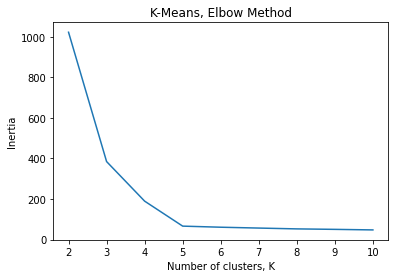

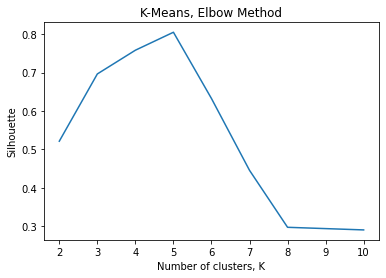

In [ ]:
#The Elbow Method - to determine the optimal number of clusters, k

inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

In [ ]:
#Use k=5 for the number of clusters

k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
k_means.labels_

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 4, 0, 0, 0, 1, 4, 1, 2, 2, 4, 0, 4,
       1, 2, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 4, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 4, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 4, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 4, 1, 2, 1, 0, 2, 1,
       2, 4, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 4, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 4, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 4, 0, 2,
       2, 0, 4, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [ ]:
#Let's look at the centers
#However these are standardized, so it makes hard to see the meaning behind it. We will reverse the transformation shortly.
k_means.cluster_centers_

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [ ]:
#Internal Validation Metrics

k_means.inertia_

66.5111137485908

In [ ]:
silhouette_score(X, k_means.labels_)

0.8048976287755765

In [ ]:
#Intepretting the clusters by first looking at the cluster means (Inverse transformation has been applied)
#For example: Cluster 0 -> age is 32, income is $105,265, spending score is 0.309 and savings is $14,962


scaler.inverse_transform(k_means.cluster_centers_)

array([[3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04]])

In [ ]:
#Let's look at some instances in each cluster

for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    print(scaler.inverse_transform(X[k_means.labels_==label].head()))


Cluster 0:
[[3.60000000e+01 9.97800000e+04 2.65432607e-01 1.63984013e+04]
 [3.00000000e+01 9.99490000e+04 3.44679224e-01 1.36216397e+04]
 [3.10000000e+01 1.07963000e+05 2.90508633e-01 1.34070814e+04]
 [3.00000000e+01 1.01073000e+05 3.14387120e-01 1.43245560e+04]
 [3.30000000e+01 1.01058000e+05 3.15081550e-01 1.49118684e+04]]

Cluster 1:
[[5.80000000e+01 7.77690000e+04 7.91328777e-01 6.55982992e+03]
 [5.90000000e+01 8.17990000e+04 7.91082047e-01 5.41766143e+03]
 [6.20000000e+01 7.47510000e+04 7.02656952e-01 9.25899297e+03]
 [5.90000000e+01 7.43730000e+04 7.65679562e-01 7.34633450e+03]
 [5.40000000e+01 7.65000000e+04 7.85197850e-01 6.87888425e+03]]

Cluster 2:
[[8.70000000e+01 1.77600000e+04 3.48777548e-01 1.68695071e+04]
 [8.70000000e+01 4.25920000e+04 3.55289682e-01 1.80862872e+04]
 [8.30000000e+01 3.43840000e+04 3.24718682e-01 1.47833791e+04]
 [8.40000000e+01 2.76930000e+04 3.67062973e-01 1.78795589e+04]
 [8.70000000e+01 3.14810000e+04 3.17423971e-01 1.61806881e+04]]

Cluster 3:
[[2.

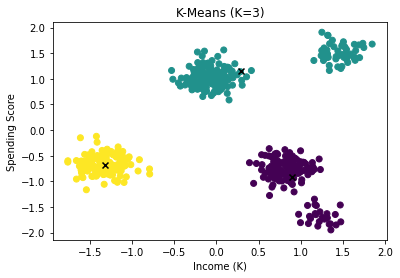

K=3, WCSS=384.81, Sil=0.70


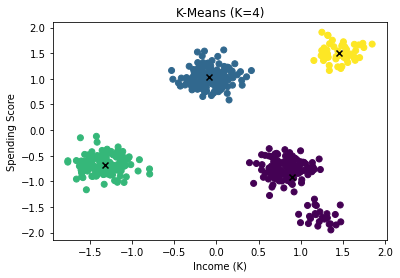

K=4, WCSS=189.70, Sil=0.76


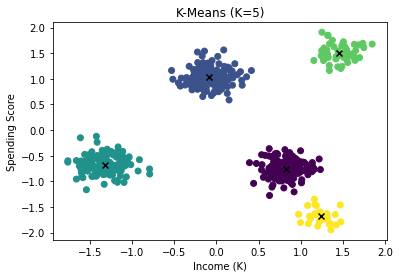

K=5, WCSS=66.51, Sil=0.80


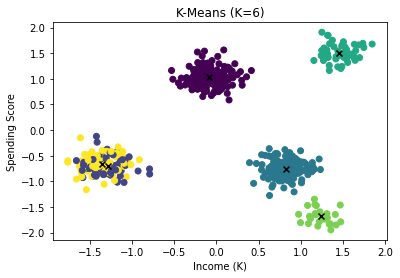

K=6, WCSS=61.15, Sil=0.63


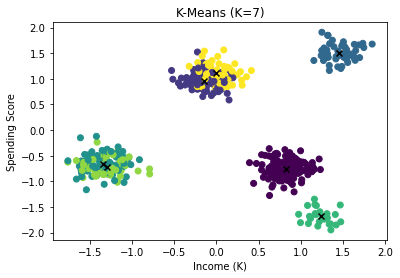

K=7, WCSS=56.96, Sil=0.45


In [ ]:
#Hyperparameter Tuning - let's experiment with lots of ks

def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)

    plt.figure();
    plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Income (K)');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_kmeans_k{}.png'.format(k))
    plt.show()
    
    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(3, 8):
    do_kmeans(X, k)

#5 clusters has the highest silhouette score 



## 1.2: Clustering Algorithm #2 DBSCAN









In [ ]:
db = DBSCAN(eps=0.3, min_samples=3)
db.fit(X)

DBSCAN(eps=0.3, min_samples=3)

In [ ]:
db.labels_

#The negative numbers show they dont belong to any clusters

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  3,  4,  4,  4,  0,  3,  0,
        1,  1,  3,  4,  3,  0,  1, -1,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        4,  0,  1,  0,  4,  4,  0,  1,  2,  0,  0,  2,  3,  2,  4,  0,  1,
        4,  2,  1,  0,  1,  4,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  4,  1,  1,  4,  0,  4,  0,  0,  2,  0, -1,  0,  1,  1,
        4,  4,  0,  0,  0,  0,  0,  2,  1,  0,  2,  4,  0,  0,  4,  4,  2,
        4,  2,  4,  1, -1,  4,  4,  0,  1,  4,  0,  4,  4,  4,  0,  4,  2,
        1,  4,  1,  1,  1,  4,  3,  0,  1,  0,  0,  4,  0,  4,  0,  2,  1,
        3,  2,  0,  4,  1,  0,  0,  2,  0,  2,  0,  3,  0,  1,  0,  4,  1,
        0,  1,  3,  4,  0,  1,  0,  4,  1,  0,  4, -1,  4,  1,  0,  4,  0,
        1,  0,  4,  0,  1,  0,  0,  1,  1,  1,  0,  0,  4,  2,  2,  1,  4,
        0,  0,  0,  4,  1,  0,  0,  0,  1, -1,  4,  1,  1,  1,  4,  0,  4,
        0,  4,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  4,  2,  4,  1,  0,
        0,  4,  1,  4,  2

In [ ]:
silhouette_score(X, db.labels_)

0.7679653694292776

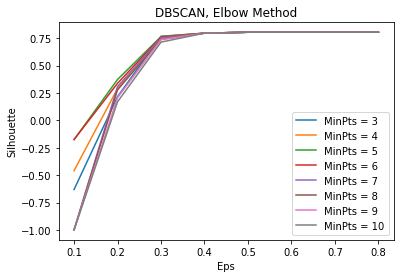

In [ ]:
#Elbow Method 

silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [3, 4, 5, 6, 7, 8, 9, 10]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        db = DBSCAN(eps=eps, min_samples=mins).fit(X)
        if len(set(db.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = silhouette_score(X, db.labels_, metric='euclidean')
    

plt.figure();
#plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));
#plt.plot(epss, ss[:, 1]);
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();

## 1.4 Model Comparison

The two chosen clustering algorithms are K-Means and DSCAN. We can measure how good each model configuration is by calculating an internal validation metric. I used the silhouette score which measures the distance between the clusters. The score ranges from -1 to 1, the higher the better your model is. Below are the scores for the two clustering algorithms:

**Clustering Algorithm #1: K-Means**
- Silhouette score: 0.805

**Clustering Algorithm #2: DBSCAN**
- Silhouette score: 0.768

**Analysis**

- For the K-Means clustering algorithm, I had to first normalize the data by applying a transformation to the features before clustering. I then used the elbow method to determine the optimal number of clusters, k. Furthermore, I tried hyperparameter tuning and experimented with lots of k to find the best k in K-Means. Choosing 5 clusters has the highest silhouette score, hence I proceeded the model with 5 clusters.

- For the DBSCAN clustering algorithm, I used the elbow method to determine the optimal hyperparameters for the MinPts and Eps, which are 0.3 and 3 respectively. Although the training speed for both models are fast and both works well with small data, the silhouette score for the DBSCAN clustering algorithm is 0.768 which is slightly lower than the silhouette score when using the K-means clustering algorithm. Therefore, K-Means is the winning model. 


## 1.5 Personas - Intrepretation of the clusters using K-Means

**Cluster 0**

- Mean Age: 33

- Mean Income: $105,265

- Mean Spending Score: 0.31

- Mean Savings: $14,962

Cluster 0 has a younger age and a high income. They recently started their career and have an average saving towards their retirement. They are very cautious about spending money, which is why they have a low spending score. This cluster is called the responsible young professionals who would rather save and invest their money than shopping.  





**Cluster 1**

- Mean Age: 60

- Mean Income: $72,448

- Mean Spending Score: 0.77

- Mean Savings: $6,889

Cluster 1 has an older age and an average income. They are close to retirement and love to shop, but don't have any savings yet. This cluster is called the carefree people in their 60s without retirement savings who shop too much! 

**Cluster 2**

- Mean Age: 88

- Mean Income: $27,866

- Mean Spending Score: 0.33

- Mean Savings: $16,659

Cluster 2 has the oldest age and the highest savings of all. Their main source of income is from their retirement fund. They also very cautious about their spending habits. This cluster is called the seniors who are in solid financial shape for retirement. 

**Cluster 3**

- Mean Age: 24

- Mean Income: $128,029

- Mean Spending Score: 0.89

- Mean Savings: $4,087

Cluster 3 has the youngest age, the highest income and the highest spending score of all. They have recently graudated and landed a high paying job. They love to spend money rather than saving for retirement. This cluster is called the young and affluent which Uncle Steve should target!

**Cluster 4**

- Mean Age: 86

- Mean Income: $119,944

- Mean Spending Score: 0.07

- Mean Savings: $14,808

Cluster 4 has an old age, a high income and the lowest spending score of all. They have an extremely good pension plan. They don't spend a lot of money and continue to save. This cluster is called the rich seniors who decrease their spending as they age. 

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

The rule {fruits} -> {vegetables} would have high support because fruits and vegetables are household staples and a high percentage of transactions would include both {fruits} and {vegetables}. It is an obvious rule that tends to be uninteresting because Uncle Steve would have already noticed that most transactions would contain these food staples, so there is nothing new to learn from this rule. 




## 2.2: A rule that might have reasonably high support but low confidence.

The rule {milk} -> {tuna} might have reasonably high support but low confidence. The reason being is although there may be higher than the support threshold for the sale of {tuna} and {milk} as these are popular products in the grocery store, but not all transactions would include both {milk} and {tuna}. The low-confidence rule would be considered uninteresting to Uncle Steve because he would have noticed that if a customer bought milk, it doesnt mean he/she would buy tuna as milk has other uses.

## 2.3: A rule that might have low support and low confidence.

The rule {toothpaste} -> {cooking oil} might have low support and low confidence. They both would have low support because toohpaste and cooking oil rarely occur and are not bought as frequent together. They both have low confidence because when {toothpaste} appears, {cooking oil} is unlikely to occur. Hence, this rule tends to be uninteresting to Uncle Steve because there are no common use cases for both items.



## 2.4: A rule that might have low support and high confidence.

The rule {strawberries} -> {chocolate} might have low support, since strawberries and chocolate are not household staples and a fairly low percentage of transactions would include them. However, {strawberries} and {chocolate} might have a high confidence because when strawberries appear in a transaction, chocolate is likely to occur. Hence, this rule is more interesting to Uncle Steve because they occur relatively frequently together. 


# Question 3: Uncle Steve's Credit Union





## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [ ]:
#Data Exploration
df3.head()

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,BadCredit,Amount,Married,Duration,City,Purpose,DateOfBirth
0,218-84-8180,F,0,Debra,Schaefer,2,3,1,503 Linda Locks,395C,0,3907,0,24,Port Keith,Vacation,1964-04-07
1,395-49-9764,M,0,Derek,Wright,0,1,1,969 Cox Dam Suite 101,UFZ 691,0,3235,0,12,Lake Debra,NewCar,1978-06-02
2,892-81-4890,F,0,Shannon,Smith,0,0,2,845 Kelly Estate,48A•281,0,3108,1,30,North Judithbury,NewCar,1972-03-18
3,081-11-7963,F,0,Christina,Brooks,2,1,3,809 Burns Creek,30Z J39,1,4014,1,36,Lake Chad,Other,1985-02-26
4,347-03-9639,M,0,Ralph,Anderson,1,5,1,248 Brandt Plains Apt. 465,71-Q331,1,3823,0,18,North Judithbury,Vacation,1983-08-08


In [ ]:
df3.shape

(6000, 17)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7a93d0fd0>,
      dtype=object)

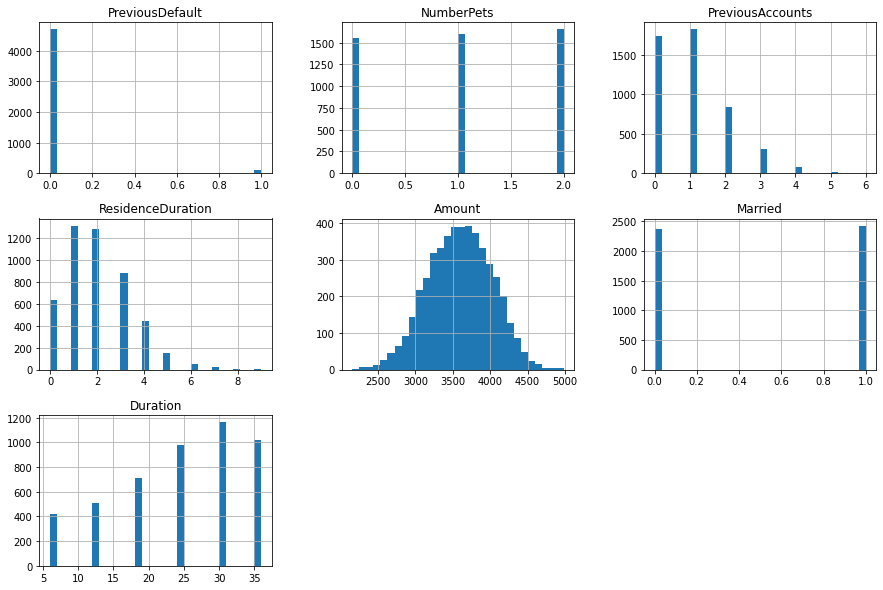

In [ ]:
#What does the data look like?
X_train.hist(bins=30, figsize=(15, 10))

In [ ]:
#Check for any missing values in the dataset
print(df3.isna().sum())


UserID               0
Sex                  0
PreviousDefault      0
FirstName            0
LastName             0
NumberPets           0
PreviousAccounts     0
ResidenceDuration    0
Street               0
LicensePlate         0
BadCredit            0
Amount               0
Married              0
Duration             0
City                 0
Purpose              0
DateOfBirth          0
dtype: int64


In [ ]:
#Make a copy of the training set
X_train_1 = X_train.copy()

In [ ]:
#Drop unnecessary features that will not help yet
X_train_1 = X_train_1.drop(['UserID','FirstName','LastName','Street','LicensePlate', 'DateOfBirth'], axis=1)

In [ ]:
#Encoding categorical features into dummy variables
X_train_1 = pd.get_dummies(data = X_train_1,
                                    drop_first = True)

In [ ]:
#take a look at the X_train set
X_train_1.head()

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_M,City_East Jessetown,City_East Jill,City_Ericmouth,City_Herrerafurt,City_Jacquelineland,City_Lake Chad,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Jessica,City_New Kellystad,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Port Jesseville,City_Port Keith,City_Ramirezstad,City_Robinsonshire,City_West Michael,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,0,2,0,2,3329,0,12,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5628,0,0,2,2,2996,0,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1756,0,2,0,3,2470,0,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2346,0,2,1,2,3745,0,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2996,0,0,1,3,3549,0,36,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Experiment with one algorithm/estimator - Logistic Regression

from sklearn.linear_model import LogisticRegression

model_1_logreg = LogisticRegression()


In [ ]:
#Train the Logistic Regression algorithm
model_1_logreg.fit(X_train_1,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Implementing K-fold cross validation on the training set - use 5 folds 

#Mean score for accuracy
scores1 = cross_val_score(model_1_logreg, X_train_1, y_train, cv = 5, scoring="accuracy")

scores1 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() *2))

#Accuracy: 0.83 (+/- 0.01)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.83 (+/- 0.01)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Mean score for f1

scores2 = cross_val_score(model_1_logreg, X_train_1, y_train, cv = 5, scoring="f1")

scores2 
print("f1: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() *2))

#f1: 0.14 (+/- 0.11)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


f1: 0.14 (+/- 0.11)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Mean score for precision
scores3 = cross_val_score(model_1_logreg, X_train_1, y_train, cv = 5, scoring="precision")

scores3 
print("Precision: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() *2))

#Precision: 0.45 (+/- 0.13)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Precision: 0.45 (+/- 0.13)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Mean score for recall 
scores4 = cross_val_score(model_1_logreg, X_train_1, y_train, cv = 5, scoring="recall")

scores4 
print("Recall: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std() *2))

#Recall: 0.08 (+/- 0.07)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Recall: 0.08 (+/- 0.07)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## 3.2: Feature engineering

In [ ]:
#Make a copy of the training set
X_train_2 = X_train.copy()

In [ ]:
#Drop the unnecessary features 
X_train_2 = X_train_2.drop(['UserID','FirstName','LastName','Street','LicensePlate'], axis=1)

In [ ]:
X_train_2.head(n=5)

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household,1970-04-22
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household,1964-06-19
1756,F,0,2,0,3,2470,0,24,East Jill,NewCar,1975-02-17
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation,1976-07-27


In [ ]:
#Feature Engineering 1 

#Change DOB to timestamp
X_train_2['DateOfBirth'] = pd.to_datetime(X_train_2.DateOfBirth)

In [ ]:
#Convert DOB to Age
from datetime import datetime
today = datetime.today()
X_train_2['age'] = X_train_2['DateOfBirth'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))


In [ ]:
#Let's take a look at the first 5 instances with the new feature, age.
X_train_2.head()

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth,age
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household,1970-04-22,51
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household,1964-06-19,57
1756,F,0,2,0,3,2470,0,24,East Jill,NewCar,1975-02-17,46
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar,1977-02-16,44
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation,1976-07-27,45


In [ ]:
#Drop the DOB feature
X_train_2 = X_train_2.drop(['DateOfBirth'], axis=1)

In [ ]:
#Feature Engineering 2 - Standardization
#Apply a transformation (use StandardScaler) to the features 

scaler = StandardScaler()
features = ['Amount', 'Duration', 'age']
X_train_2[features] = scaler.fit_transform(X_train_2[features])


In [ ]:
X_train_2[features].head(10)

,Amount,Duration,age
3897,-0.627068,-1.307621,0.574035
5628,-1.410231,1.248250,1.584685
1756,-2.647298,-0.029685,-0.268173
2346,0.351297,0.609282,-0.605057
2996,-0.109664,1.248250,-0.436615
1595,0.320723,-1.946589,0.068710
5966,0.207834,-1.307621,0.405594
3252,-0.881067,-0.668653,0.910919
829,-0.685864,0.609282,0.405594
5864,0.607647,-1.307621,-0.099732


In [ ]:
#Feature Engineering 3 - One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc = enc.fit(X_train_2[['City','Sex','Purpose']])

enc.transform(X_train_2[['City','Sex','Purpose']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Revert back into the original pandas dataframe.

_ohe_array = enc.transform(X_train_2[['City','Sex','Purpose']])
_ohe_names = enc.get_feature_names()
for i in range(_ohe_array.shape[1]):
  X_train_2[_ohe_names[i]] = _ohe_array[:,i]

X_train_2.head(n=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,age,x0_Cassandraton,x0_East Jessetown,x0_East Jill,x0_Ericmouth,x0_Herrerafurt,x0_Jacquelineland,x0_Lake Chad,x0_Lake Debra,x0_Lake Roberto,x0_Lisatown,x0_New Jessica,x0_New Kellystad,x0_New Roberttown,x0_North Judithbury,x0_North Noahstad,x0_Port Jesseville,x0_Port Keith,x0_Ramirezstad,x0_Robinsonshire,x0_West Michael,x1_F,x1_M,x2_Business,x2_Education,x2_Household,x2_NewCar,x2_Other,x2_Repair,x2_UsedCar,x2_Vacation
3897,M,0,2,0,2,-0.627068,0,-1.307621,New Roberttown,Household,0.574035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5628,F,0,0,2,2,-1.410231,0,1.248250,Ericmouth,Household,1.584685,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1756,F,0,2,0,3,-2.647298,0,-0.029685,East Jill,NewCar,-0.268173,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2346,F,0,2,1,2,0.351297,0,0.609282,Lake Debra,UsedCar,-0.605057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2996,M,0,0,1,3,-0.109664,0,1.248250,North Judithbury,Vacation,-0.436615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1595,M,0,2,2,4,0.320723,0,-1.946589,North Judithbury,NewCar,0.068710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5966,F,0,0,0,4,0.207834,1,-1.307621,New Roberttown,Vacation,0.405594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3252,F,1,2,1,1,-0.881067,1,-0.668653,Lake Debra,UsedCar,0.910919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
829,F,0,0,1,1,-0.685864,1,0.609282,Lisatown,Household,0.405594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5864,M,0,2,2,4,0.607647,1,-1.307621,New Roberttown,UsedCar,-0.099732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Now we can drop the categorical features 
X_train_2 = X_train_2.drop(['Sex','City','Purpose'], axis=1)


In [ ]:
#Lets take a look at the train set
X_train_2.head(n=10)

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,age,x0_Cassandraton,x0_East Jessetown,x0_East Jill,x0_Ericmouth,x0_Herrerafurt,x0_Jacquelineland,x0_Lake Chad,x0_Lake Debra,x0_Lake Roberto,x0_Lisatown,x0_New Jessica,x0_New Kellystad,x0_New Roberttown,x0_North Judithbury,x0_North Noahstad,x0_Port Jesseville,x0_Port Keith,x0_Ramirezstad,x0_Robinsonshire,x0_West Michael,x1_F,x1_M,x2_Business,x2_Education,x2_Household,x2_NewCar,x2_Other,x2_Repair,x2_UsedCar,x2_Vacation
3897,0,2,0,2,-0.627068,0,-1.307621,0.574035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5628,0,0,2,2,-1.410231,0,1.248250,1.584685,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1756,0,2,0,3,-2.647298,0,-0.029685,-0.268173,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2346,0,2,1,2,0.351297,0,0.609282,-0.605057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2996,0,0,1,3,-0.109664,0,1.248250,-0.436615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1595,0,2,2,4,0.320723,0,-1.946589,0.068710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5966,0,0,0,4,0.207834,1,-1.307621,0.405594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3252,1,2,1,1,-0.881067,1,-0.668653,0.910919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
829,0,0,1,1,-0.685864,1,0.609282,0.405594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5864,0,2,2,4,0.607647,1,-1.307621,-0.099732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
model_1b_logreg = LogisticRegression()

In [ ]:
#Re-train the model
#Re-train the Logistic Regression algorithm
model_1b_logreg.fit(X_train_2,y_train)


LogisticRegression()

In [ ]:
#Implementing K-fold cross validation on the training set - use 5 folds 

#Mean score for accuracy
scores1b = cross_val_score(model_1b_logreg, X_train_2, y_train, cv = 5, scoring="accuracy")

scores1b 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1b.mean(), scores1b.std() *2))

#Accuracy: 0.89 (+/- 0.02) better than model 1

Accuracy: 0.89 (+/- 0.02)


In [ ]:
#Mean score for f1

scores2b = cross_val_score(model_1b_logreg, X_train_2, y_train, cv = 5, scoring="f1")

scores2b 
print("f1: %0.2f (+/- %0.2f)" % (scores2b.mean(), scores2b.std() *2))

#f1: 0.64 (+/- 0.08) better than model 1

f1: 0.64 (+/- 0.08)


In [ ]:
#Mean score for precision
scores3b = cross_val_score(model_1b_logreg, X_train_2, y_train, cv = 5, scoring="precision")

scores3b 
print("Precision: %0.2f (+/- %0.2f)" % (scores3b.mean(), scores3b.std() *2))

#Precision: 0.73 (+/- 0.06) better than model 1

Precision: 0.73 (+/- 0.05)


In [ ]:
#Mean score for recall 
scores4b = cross_val_score(model_1b_logreg, X_train_2, y_train, cv = 5, scoring="recall")

scores4b 
print("Recall: %0.2f (+/- %0.2f)" % (scores4b.mean(), scores4b.std() *2))

#Recall: 0.56 (+/- 0.11) better than model 1

Recall: 0.56 (+/- 0.11)


## 3.3: Feature selection

In [ ]:
from sklearn.feature_selection import RFECV, RFE

In [ ]:
#Recursive Feature Elimination (Wrapper Method)

model_1c_logreg = LogisticRegression(random_state=0)

sel = RFE(estimator=model_1c_logreg, n_features_to_select=10)
sel = sel.fit(X_train_2, y_train)

X_train_3 = sel.transform(X_train_2)

In [ ]:
X_train_3.shape

(4800, 10)

In [ ]:
model_1c_logreg.fit(X_train_3,y_train)

LogisticRegression(random_state=0)

In [ ]:
#Implementing K-fold cross validation on the training set - use 5 folds 

#Mean score for accuracy
scores1c = cross_val_score(model_1c_logreg, X_train_3, y_train, cv = 5, scoring="accuracy")

scores1c
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1c.mean(), scores1c.std() *2))

#Accuracy: 0.89 (+/- 0.02) same as model 1b

Accuracy: 0.89 (+/- 0.02)


In [ ]:
#Mean score for f1

scores2c = cross_val_score(model_1c_logreg, X_train_3, y_train, cv = 5, scoring="f1")

scores2c 
print("f1: %0.2f (+/- %0.2f)" % (scores2c.mean(), scores2c.std() *2))

#f1: 0.64 (+/- 0.08) better than model 1b

f1: 0.64 (+/- 0.08)


In [ ]:
#Mean score for precision
scores3c = cross_val_score(model_1c_logreg, X_train_3, y_train, cv = 5, scoring="precision")

scores3c
print("Precision: %0.2f (+/- %0.2f)" % (scores3c.mean(), scores3c.std() *2))

#Precision: 0.73 (+/- 0.04) same as model 1b

Precision: 0.73 (+/- 0.04)


In [ ]:
#Mean score for recall 
scores4c = cross_val_score(model_1c_logreg, X_train_3, y_train, cv = 5, scoring="recall")

scores4c
print("Recall: %0.2f (+/- %0.2f)" % (scores4c.mean(), scores4c.std() *2))

#Recall: 0.57 (+/- 0.12) better than model 1b

Recall: 0.57 (+/- 0.11)


## 3.4: Hyperparameter tuning

In [ ]:
model_1d_logreg = LogisticRegression()                              

In [ ]:
model_1d_logreg = LogisticRegression(C=100, penalty='l2', solver='newton-cg', random_state=0)

In [ ]:
model_1d_logreg.fit(X_train_3,y_train)

LogisticRegression(C=100, random_state=0, solver='newton-cg')

In [ ]:
#Implementing K-fold cross validation on the training set - use 5 folds 

#Mean score for accuracy
scores1d = cross_val_score(model_1d_logreg, X_train_3, y_train, cv = 5, scoring="accuracy")

scores1d
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1d.mean(), scores1d.std() *2))

#Accuracy: 0.89 (+/- 0.01) same as model 1b

Accuracy: 0.89 (+/- 0.01)


In [ ]:
#Now let's prep for grid search - more convenient to measure performance
#Here are the parameters I would like to try

penalty = ['l2']
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
#Define grid search

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=10, random_state=0)
search = GridSearchCV(estimator=model_1d_logreg, param_grid=grid, cv=cv, scoring='f1_macro', verbose=1)
search = search.fit(X_train_3, y_train)

Fitting 150 folds for each of 15 candidates, totalling 2250 fits


In [ ]:
#Summarize results from grid search
print("Best combination of hyper-parameters: %f using %s" % (search.best_score_, search.best_params_))
mean = search.cv_results_['mean_test_score']
std = search.cv_results_['std_test_score']
param = search.cv_results_['params']
for mean, stdev, param in zip(mean, std, param):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best combination of hyper-parameters: 0.785789 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.785675 (0.028960) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.785675 (0.028960) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.785706 (0.028991) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.785781 (0.029002) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.785733 (0.029054) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.785789 (0.029066) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.785234 (0.028638) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.785234 (0.028638) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.784833 (0.028730) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.783498 (0.029079) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.783498 (0.029079) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.785689 (0.028691) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'libl

## 3.5: Performance estimation

In [ ]:
#Make a copy of the testing set
X_test_1 = X_test.copy()

In [ ]:
#Clean data for test set: drop unnecessary features 
X_test_1 = X_test_1.drop(['UserID','FirstName','LastName','Street','LicensePlate'], axis=1)

In [ ]:
#Let's take a look at the test set
X_test_1.head(n=5)

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth
1782,F,0,1,1,3,3773,0,36,North Judithbury,NewCar,1970-10-15
3917,F,0,0,0,3,3412,0,24,Lake Roberto,UsedCar,1963-09-01
221,F,0,2,2,0,4146,0,24,West Michael,NewCar,1970-12-19
2135,M,0,2,1,1,3608,1,30,East Jessetown,UsedCar,1963-08-05
5224,F,0,2,1,1,2947,1,24,North Judithbury,NewCar,1978-05-11


In [ ]:
#Apply the same Feature Engineering to the test set

#Change DOB to timestamp
X_test_1['DateOfBirth'] = pd.to_datetime(X_test_1.DateOfBirth)

In [ ]:
#Convert DOB to Age

today = datetime.today()
X_test_1['age'] = X_test_1['DateOfBirth'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

In [ ]:
#let's look at the test set
X_test_1.head(n=5)

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth,age
1782,F,0,1,1,3,3773,0,36,North Judithbury,NewCar,1970-10-15,51
3917,F,0,0,0,3,3412,0,24,Lake Roberto,UsedCar,1963-09-01,58
221,F,0,2,2,0,4146,0,24,West Michael,NewCar,1970-12-19,50
2135,M,0,2,1,1,3608,1,30,East Jessetown,UsedCar,1963-08-05,58
5224,F,0,2,1,1,2947,1,24,North Judithbury,NewCar,1978-05-11,43


In [ ]:
#Drop the DOB feature
X_test_1 = X_test_1.drop(['DateOfBirth'], axis=1)

In [ ]:
#Feature Engineering 2 - Standardization to test set
#Apply a transformation (use StandardScaler) to the features 

scaler = StandardScaler()
features = ['Amount', 'Duration', 'age']
X_test_1[features] = scaler.fit_transform(X_test_1[features])

In [ ]:
#One Hot Encoding to the test set

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc = enc.fit(X_test_1[['City','Sex','Purpose']])

enc.transform(X_test_1[['City','Sex','Purpose']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
#Revert back into the original pandas dataframe.

_ohe_array = enc.transform(X_test_1[['City','Sex','Purpose']])
_ohe_names = enc.get_feature_names()
for i in range(_ohe_array.shape[1]):
  X_test_1[_ohe_names[i]] = _ohe_array[:,i]

X_test_1.head(n=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,age,x0_Cassandraton,x0_East Jessetown,x0_East Jill,x0_Ericmouth,x0_Herrerafurt,x0_Jacquelineland,x0_Lake Chad,x0_Lake Debra,x0_Lake Roberto,x0_Lisatown,x0_New Jessica,x0_New Kellystad,x0_New Roberttown,x0_North Judithbury,x0_North Noahstad,x0_Port Jesseville,x0_Port Keith,x0_Ramirezstad,x0_Robinsonshire,x0_West Michael,x1_F,x1_M,x2_Business,x2_Education,x2_Household,x2_NewCar,x2_Other,x2_Repair,x2_UsedCar,x2_Vacation
1782,F,0,1,1,3,0.458866,0,1.290848,North Judithbury,NewCar,0.527859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3917,F,0,0,0,3,-0.373567,0,0.038104,Lake Roberto,UsedCar,1.646711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
221,F,0,2,2,0,1.318970,0,0.038104,West Michael,NewCar,0.368023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2135,M,0,2,1,1,0.078391,1,0.664476,East Jessetown,UsedCar,1.646711,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5224,F,0,2,1,1,-1.445815,1,0.038104,North Judithbury,NewCar,-0.750830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1168,F,0,2,3,2,1.005367,1,-0.588267,New Roberttown,Education,1.167203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
879,F,0,1,2,0,-0.129141,0,-1.841011,East Jessetown,UsedCar,1.486875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,F,0,1,4,1,-0.066881,0,0.038104,North Judithbury,NewCar,-1.070502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1657,F,0,1,0,2,0.548797,1,-1.841011,East Jill,Other,1.646711,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
323,F,0,1,0,3,-0.500392,1,0.664476,North Judithbury,Education,1.007367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Now we can drop the categorical features 
X_test_1 = X_test_1.drop(['Sex','City','Purpose'], axis=1)


In [ ]:
#Let's take a look again at the test set
X_test_1.head(n=5)

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,age,x0_Cassandraton,x0_East Jessetown,x0_East Jill,x0_Ericmouth,x0_Herrerafurt,x0_Jacquelineland,x0_Lake Chad,x0_Lake Debra,x0_Lake Roberto,x0_Lisatown,x0_New Jessica,x0_New Kellystad,x0_New Roberttown,x0_North Judithbury,x0_North Noahstad,x0_Port Jesseville,x0_Port Keith,x0_Ramirezstad,x0_Robinsonshire,x0_West Michael,x1_F,x1_M,x2_Business,x2_Education,x2_Household,x2_NewCar,x2_Other,x2_Repair,x2_UsedCar,x2_Vacation
1782,0,1,1,3,0.458866,0,1.290848,0.527859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3917,0,0,0,3,-0.373567,0,0.038104,1.646711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
221,0,2,2,0,1.318970,0,0.038104,0.368023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2135,0,2,1,1,0.078391,1,0.664476,1.646711,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5224,0,2,1,1,-1.445815,1,0.038104,-0.750830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Apply feature selection to test set - Recursive Feature Elimination (Wrapper Method)

model_final_logreg = LogisticRegression(random_state=0)

sel = RFE(estimator=model_final_logreg, n_features_to_select=10)
sel = sel.fit(X_test_1, y_test)

X_test_1 = sel.transform(X_test_1)

In [ ]:
#These are the best parameters when using grid searching
#Best combination: 0.785789 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

model_final_logreg = LogisticRegression(C=10, penalty='l2', solver='liblinear', random_state=0)

In [ ]:
#Fit the model

model_final_logreg.fit(X_test_1,y_test)

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [ ]:
#Use the testing data (unseen data) in the final model to get predictions

pred_lr_final = model_final_logreg.predict(X_test_1)
pred_lr_final

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Model performance - confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_lr_final)

array([[953,  38],
       [ 81, 128]])

In [ ]:
#Model performance - classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, pred_lr_final))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       991
           1       0.77      0.61      0.68       209

    accuracy                           0.90      1200
   macro avg       0.85      0.79      0.81      1200
weighted avg       0.90      0.90      0.90      1200



# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



**Answer:**

Maintenance cost without any predictive maintenance models for 1 year:

- Assumption: 1 turbine breaks/fails every 2 days
- Cost of repairing 1 turbine: $20,000
- Number of days: 365 days

- **Total maintenance cost for 1 year: (365/2) * 20000 = $3,650,000**

**Cost Matrix:**

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 2500 | 20,000 |
| **Actual No Fail**   | 500 | - |



**Cost Confusion for the random forest:**

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 502,500 | 1,100,000 |
| **Actual No Fail**   | 25,000 | - |

Total Cost for 1 year: $1,627,500

**Cost Confusion for the RNN:**

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 565,000 | 600,000 |
| **Actual No Fail**   | 600,000 | - |

Total Cost for 1 year: $1,765,000


Both models have accuracy scores > 99%. The RNN has better recall at 88.3% versus the random forest model has a recall at 78.5%. The precision for the RNN is 15.8% and 80% for the random forest model. Based on the assessment of each model shown above, Uncle Steven should use the random forest model because he will save an extra $137,500 compared to using the RNN model. 
